In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import re
import matplotlib.pyplot as plt

import seaborn as sns 

In [3]:
df = pd.read_csv('flats.csv', sep='^')
df

,Общая площадь,Площадь кухни,Этаж,Тип комнат,Санузел,Ремонт,Способ продажи,Тип дома,Этажей в доме,Двор,...,Балкон или лоджия,Техника,Тёплый пол,Отделка,Название новостройки,Официальный застройщик,Тип участия,Срок сдачи,"Корпус, строение",Запланирован снос
0,51 м²,14.2 м²,11 из 25,изолированные,совмещенный,дизайнерский,свободная,монолитный,25,"закрытая территория, детская площадка, спортив...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13.5 м²,NaN,1 из 9,NaN,совмещенный,требует ремонта,свободная,кирпичный,9,детская площадка,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,65.3 м²,9.2 м²,7 из 8,изолированные,раздельный,косметический,свободная,панельный,8,"детская площадка, спортивная площадка",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,80 м²,8.3 м²,4 из 5,смежные,раздельный,требует ремонта,альтернативная,кирпичный,5,"детская площадка, спортивная площадка",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13.2 м²,NaN,4 из 5,NaN,совмещенный,евро,свободная,кирпичный,5,"детская площадка, спортивная площадка",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2991,85 м²,9 м²,7 из 7,смежные,совмещенный,дизайнерский,свободная,монолитный,7,закрытая территория,...,NaN,"кондиционер, холодильник, стиральная машина, п...",есть,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2992,32 м²,15.8 м²,17 из 19,NaN,совмещенный,косметический,свободная,монолитный,19,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2993,32.1 м²,NaN,16 из 23,NaN,совмещенный,требует ремонта,свободная,монолитный,23,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2994,27.2 м²,NaN,3 из 4,NaN,совмещенный,дизайнерский,свободная,кирпичный,4,NaN,...,NaN,"холодильник, стиральная машина",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:


df['Год постройки']

0          NaN
1       1974.0
2          NaN
3          NaN
4       1900.0
         ...  
2991    2018.0
2992       NaN
2993    2022.0
2994    1935.0
2995    1985.0
Name: Год постройки, Length: 2996, dtype: float64

In [5]:
df.columns

Index(['Общая площадь', 'Площадь кухни', 'Этаж', 'Тип комнат', 'Санузел',
       'Ремонт', 'Способ продажи', 'Тип дома', 'Этажей в доме', 'Двор',
       'Парковка', 'Цена', 'Валюта', 'Местоположение', 'Ссылка',
       'Высота потолков', 'Окна', 'Вид сделки', 'Год постройки', 'В доме',
       'Жилая площадь', 'Пассажирский лифт', 'Грузовой лифт', 'Мебель',
       'Балкон или лоджия', 'Техника', 'Тёплый пол', 'Отделка',
       'Название новостройки', 'Официальный застройщик', 'Тип участия',
       'Срок сдачи', 'Корпус, строение', 'Запланирован снос'],
      dtype='object')

In [6]:
df = pd.read_csv('flats.csv', sep='^')

for column in ['Общая площадь', 'Площадь кухни', 'Жилая площадь', 'Высота потолков', 'Год постройки']:
    df[column] = df[column].apply(
        lambda x : 
            x if str(x) == "nan" else float(str(x)[:-2])
        ).fillna(0)

def reduce(h):
    if str(h) == 'nan':
        return h
    while h > 10:
        h /= 10
    return h


for column in ['Пассажирский лифт', 'Грузовой лифт']:
    df[column] = df[column].apply(
        lambda x : 
            x if str(x) == "nan" else (x if str(x) != 'нет' else 0)
        ).astype('string')

df['Этаж'] = df['Этаж'].apply(lambda x : int(str(x).split(' из ')[0]))

for column in [
    'Балкон или лоджия', 'Тип комнат', 'Санузел', 
    'Окна', 'Ремонт', 'Мебель', 'Техника', 
    'Способ продажи', 'Вид сделки', 'Тип дома',
    'В доме', 'Местоположение', 'Двор', 'Парковка',
    'Тёплый пол', 'Запланирован снос', 'Отделка',
    
]:
    df[column] = df[column].astype('string')

df.drop(
    ['Валюта', 'Ссылка', 'Название новостройки', 'Корпус, строение', 'Официальный застройщик', 'Тип участия', 'Срок сдачи'], 
    inplace=True, axis=1
    )


df.head(1)

,Общая площадь,Площадь кухни,Этаж,Тип комнат,Санузел,Ремонт,Способ продажи,Тип дома,Этажей в доме,Двор,...,В доме,Жилая площадь,Пассажирский лифт,Грузовой лифт,Мебель,Балкон или лоджия,Техника,Тёплый пол,Отделка,Запланирован снос
0,51.0,14.2,11,изолированные,совмещенный,дизайнерский,свободная,монолитный,25,"закрытая территория, детская площадка, спортив...",...,<NA>,0.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [7]:
df.dtypes

Общая площадь        float64
Площадь кухни        float64
Этаж                   int64
Тип комнат            string
Санузел               string
Ремонт                string
Способ продажи        string
Тип дома              string
Этажей в доме          int64
Двор                  string
Парковка              string
Цена                 float64
Местоположение        string
Высота потолков      float64
Окна                  string
Вид сделки            string
Год постройки        float64
В доме                string
Жилая площадь        float64
Пассажирский лифт     string
Грузовой лифт         string
Мебель                string
Балкон или лоджия     string
Техника               string
Тёплый пол            string
Отделка               string
Запланирован снос     string
dtype: object

In [8]:
df.isna().sum()

Общая площадь           0
Площадь кухни           0
Этаж                    0
Тип комнат           1368
Санузел               338
Ремонт                304
Способ продажи        226
Тип дома                0
Этажей в доме           0
Двор                 1349
Парковка             1168
Цена                    0
Местоположение          0
Высота потолков         0
Окна                  817
Вид сделки           1158
Год постройки           0
В доме               1619
Жилая площадь           0
Пассажирский лифт    1042
Грузовой лифт        1512
Мебель               2120
Балкон или лоджия    1606
Техника              2242
Тёплый пол           2765
Отделка              2731
Запланирован снос    2963
dtype: int64

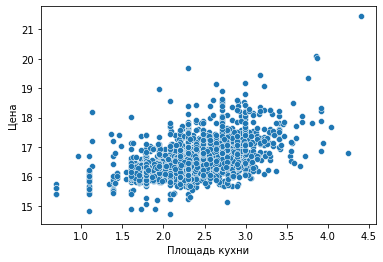

In [9]:
sns.scatterplot(
    data=df, 
    x=np.log(df['Площадь кухни']), y=np.log(df['Цена']), 
);

Исходя из данного графика можно сделать вывод, что связь между стоимостью квартир и площадью кухни предположительно линейная, причем положительно. Однако есть выбросы

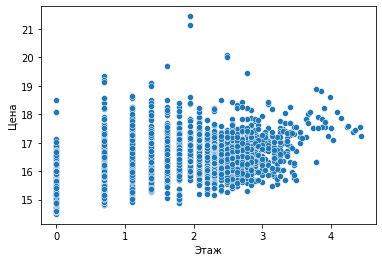

In [10]:
sns.scatterplot(
    data=df, 
    x=np.log(df['Этаж']), y=np.log(df['Цена']), 
);

На данном графике нет возможности выявить какую-либо связь между стоимостью квартир и этажем, однако, на 2 и 3 этаже сконцентрировано наибольшее количество элементов выборки. Имеются сильные выбросы.

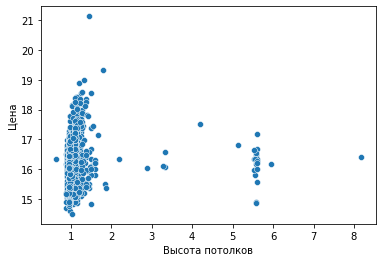

In [146]:
sns.scatterplot(
    data=df, 
    x=np.log(df['Высота потолков']), y=np.log(df['Цена']), 
);

Анализируя данный график можно сделать вывод, что в основном высота потолков - 1-2 метра, есть выбросы

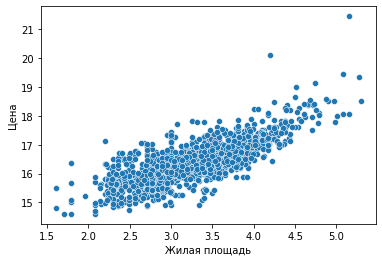

In [147]:
sns.scatterplot(
    data=df, 
    x=np.log(df['Жилая площадь']), y=np.log(df['Цена']), 
);


На данном графике прослеживается положительная линейная взаимосвязь между жилой площадью и стоимостью квартиры

Text(0.5, 0, 'Этаж')

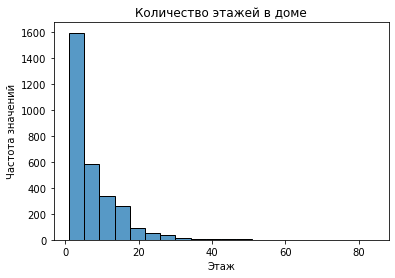

In [191]:
sns.histplot(data = df['Этаж'], bins=20)
plt.title('Количество этажей в доме')
plt.ylabel('Частота значений')
plt.xlabel('Этаж')

Судя по данной гистограмме распределение этажей похоже на экспоненциальное 

Text(0.5, 0, 'Цена')

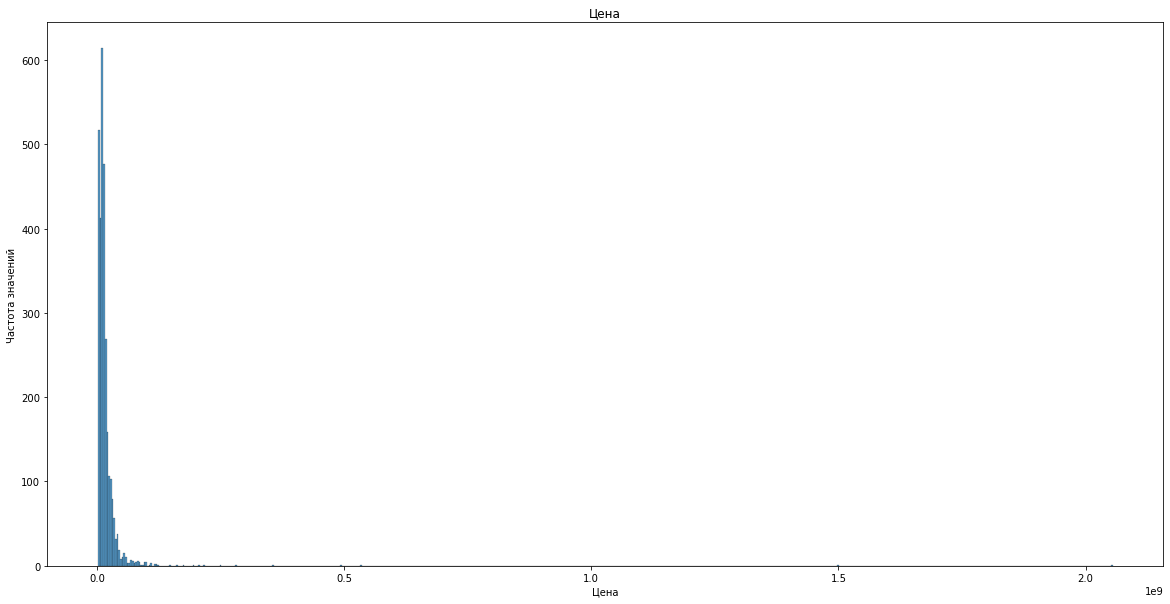

In [199]:
plt.figure(figsize=(20, 10))
sns.histplot(data = df['Цена'], bins=600)
plt.title('Цена')
plt.ylabel('Частота значений')
plt.xlabel('Цена')

Распределение цены похоже на что-то между экспоненциальным и нормальным

Text(0.5, 0, 'Общая площадь')

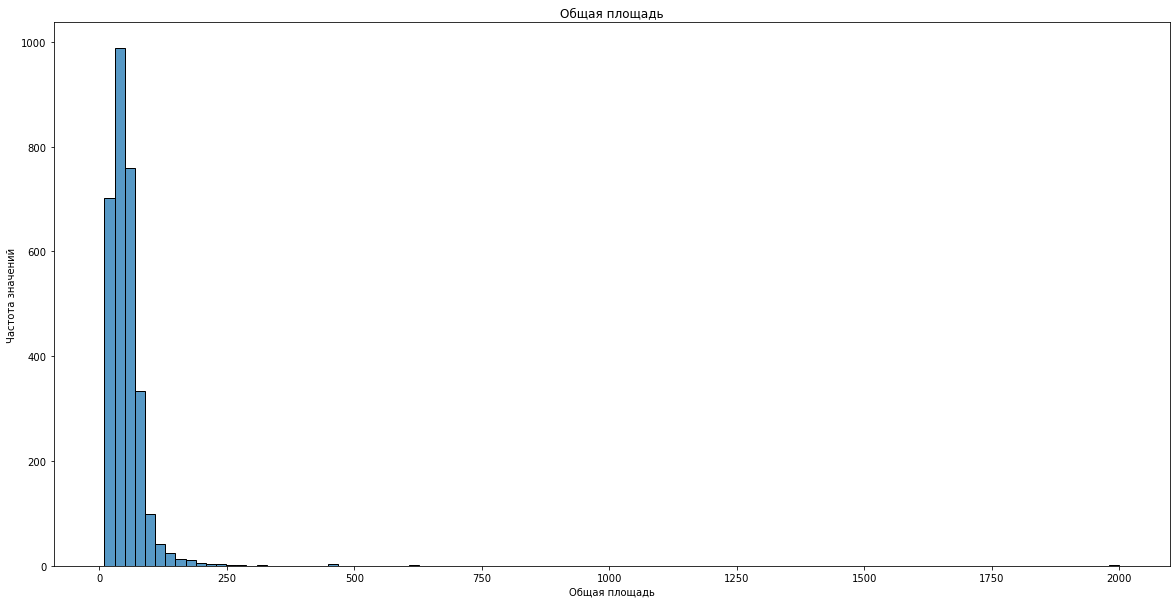

In [205]:
plt.figure(figsize=(20, 10))
sns.histplot(data = df['Общая площадь'], bins=100)
plt.title('Общая площадь')
plt.ylabel('Частота значений')
plt.xlabel('Общая площадь')

Распределение площади похоже на нормальное распределение и одной модой

Text(0.5, 0, 'Площадь кухни')

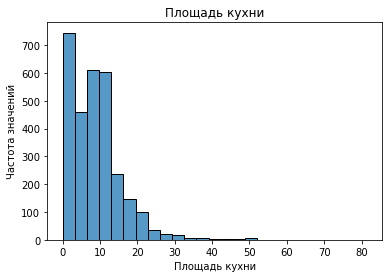

In [209]:
sns.histplot(data = df['Площадь кухни'], bins=25)
plt.title('Площадь кухни')
plt.ylabel('Частота значений')
plt.xlabel('Площадь кухни')

Распределение площади кухни похоже на бимодальное

Text(0.5, 0, 'Жилая площадь')

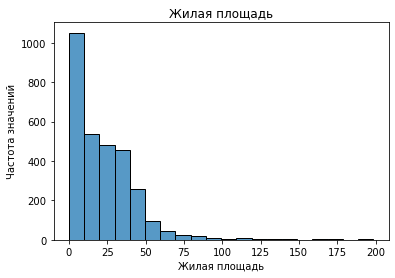

In [220]:
sns.histplot(data = df['Жилая площадь'], bins=20)
plt.title('Жилая площадь')
plt.ylabel('Частота значений')
plt.xlabel('Жилая площадь')

Распределение жилой площади похоже на экспоненциальное

Text(0.5, 0, 'Этажей в доме')

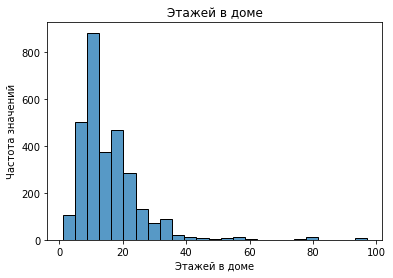

In [217]:
sns.histplot(data = df['Этажей в доме'], bins=25)
plt.title('Этажей в доме')
plt.ylabel('Частота значений')
plt.xlabel('Этажей в доме')

Распределение этажей в доме похоже на нормальное 

In [180]:
df.corr()

,Общая площадь,Площадь кухни,Этаж,Этажей в доме,Цена,Высота потолков,Год постройки,Жилая площадь
Общая площадь,1.000000,0.426514,0.188919,0.150490,0.718029,-0.004069,-0.044796,0.396019
Площадь кухни,0.426514,1.000000,0.312894,0.317369,0.323390,0.003902,-0.105161,0.308455
Этаж,0.188919,0.312894,1.000000,0.738666,0.097779,0.004386,-0.127474,0.085571
Этажей в доме,0.150490,0.317369,0.738666,1.000000,0.067512,-0.013652,-0.138311,0.030048
Цена,0.718029,0.323390,0.097779,0.067512,1.000000,-0.004278,-0.040180,0.226864
Высота потолков,-0.004069,0.003902,0.004386,-0.013652,-0.004278,1.000000,0.031603,0.022235
Год постройки,-0.044796,-0.105161,-0.127474,-0.138311,-0.040180,0.031603,1.000000,0.006929
Жилая площадь,0.396019,0.308455,0.085571,0.030048,0.226864,0.022235,0.006929,1.000000


In [149]:
correlation = df.corr()

<AxesSubplot:>

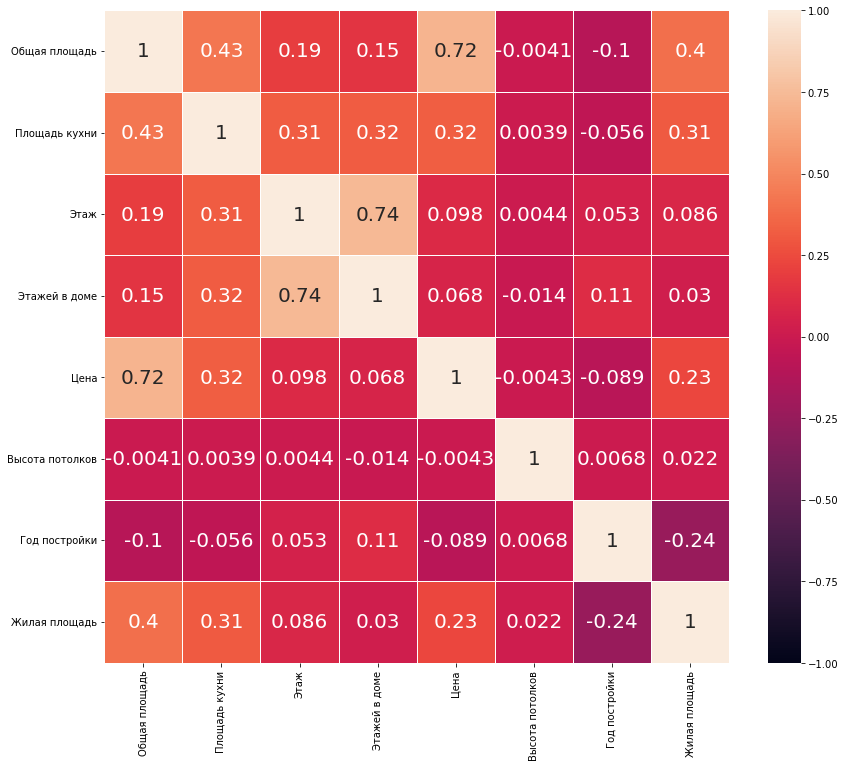

In [150]:
fig, ax = plt.subplots(figsize = (14, 12))
sns.heatmap(correlation, annot=True, linecolor = 'white', linewidth=0.5,
           annot_kws = {'size' : 20}, vmax = 1, vmin =-1)

<AxesSubplot:xlabel='Этаж', ylabel='Цена'>

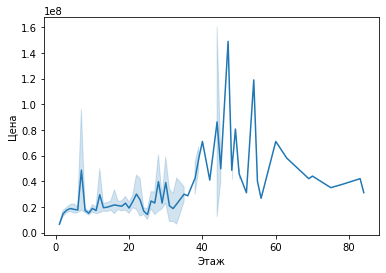

In [151]:
sns.lineplot(data=df, x="Этаж", y="Цена")

Квартиры находящиеся на 40 - 60 этаже стоят дороже, возможно это связано с тем, что с этой высоты открывается лучший вид, после 60 этажа стоимость квартир падает, это возможно связано с высоким давлением на такой высоте и низки уровнем кислорода

<AxesSubplot:xlabel='Тип комнат', ylabel='Цена'>

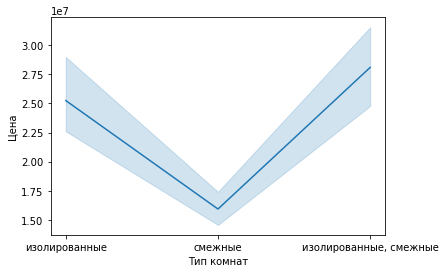

In [152]:
sns.lineplot(data=df, x="Тип комнат", y="Цена")

Квартиры, в которых есть как смежные, так и изолированные комнаты обладают большей стоимостью


<AxesSubplot:xlabel='Санузел', ylabel='Цена'>

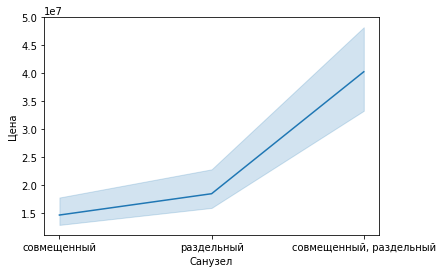

In [154]:
sns.lineplot(data=df, x="Санузел", y="Цена")

Если в квартире есть и совмещенный и раздельный туалет, то они обладают большей стоимостью 

<AxesSubplot:xlabel='Ремонт', ylabel='Цена'>

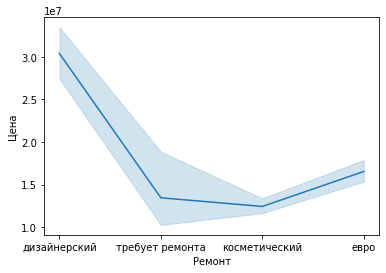

In [155]:
sns.lineplot(data=df, x="Ремонт", y="Цена")

Дороже всего квартиры стоят с дизайнерским ремонтом

<AxesSubplot:xlabel='Способ продажи', ylabel='Цена'>

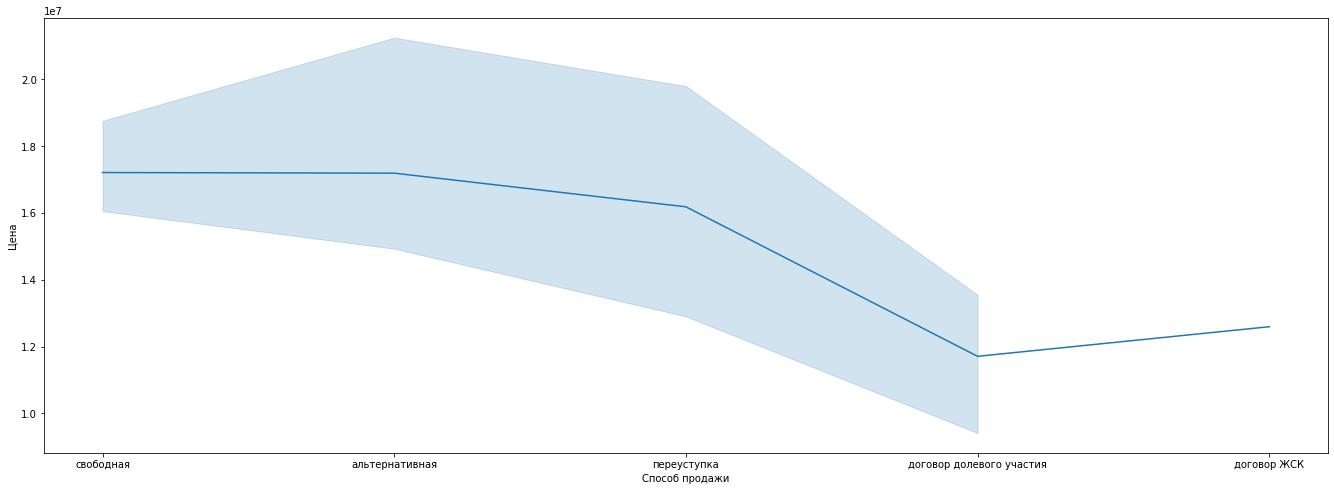

In [156]:
plt.figure(figsize=(23, 8))
sns.lineplot(data=df, x="Способ продажи", y="Цена")

Люди ценят свободу, поэтому квартиры со свободной продажей дороже всего стоят 

<AxesSubplot:xlabel='Тип дома', ylabel='Цена'>

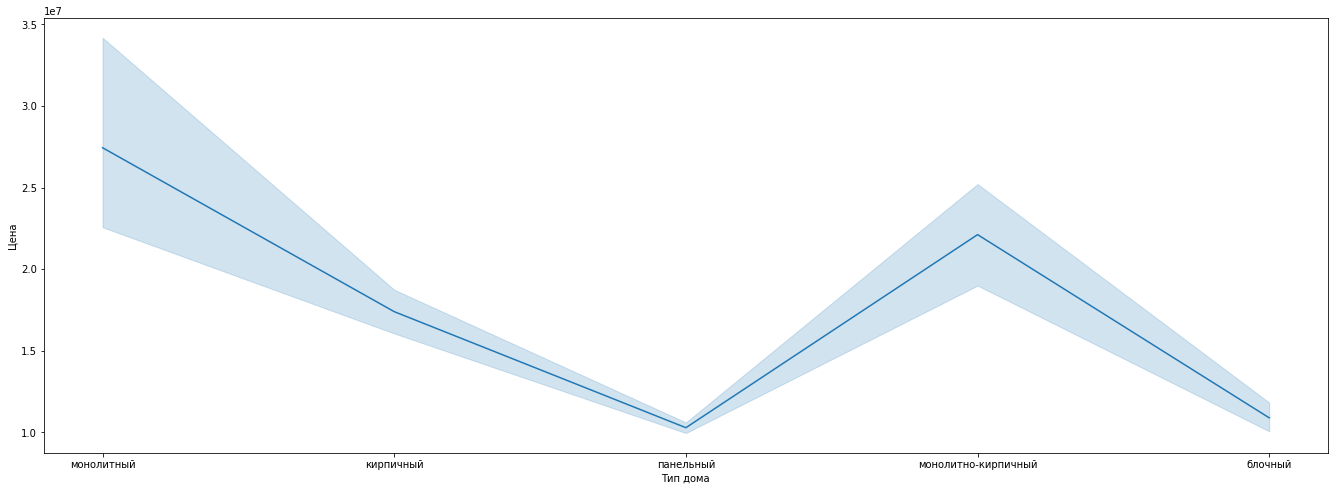

In [157]:
plt.figure(figsize=(23, 8))
sns.lineplot(data=df, x="Тип дома", y="Цена")

Монолитный дома может быть надежнее и практичнее, поэтому там квартиры дороже


<AxesSubplot:xlabel='Окна', ylabel='Цена'>

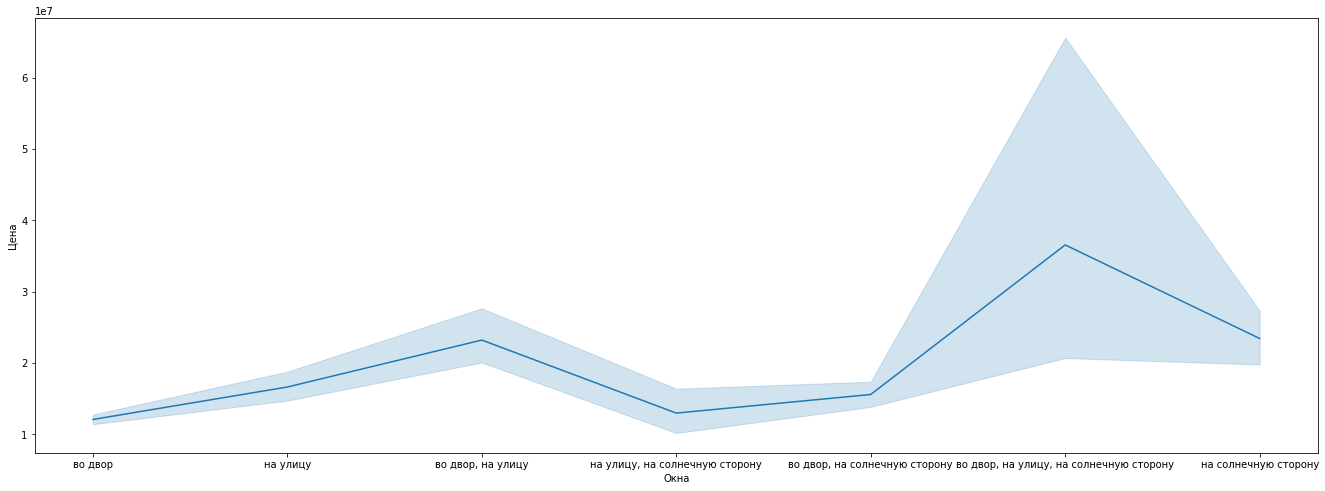

In [158]:
plt.figure(figsize=(23, 8))
sns.lineplot(data=df, x="Окна", y="Цена")

Кайф, когда из окна вид на все сразу и во двор, и на улицу, и на солнечную сторону, за это придется больше заплатить

<AxesSubplot:xlabel='Вид сделки', ylabel='Цена'>

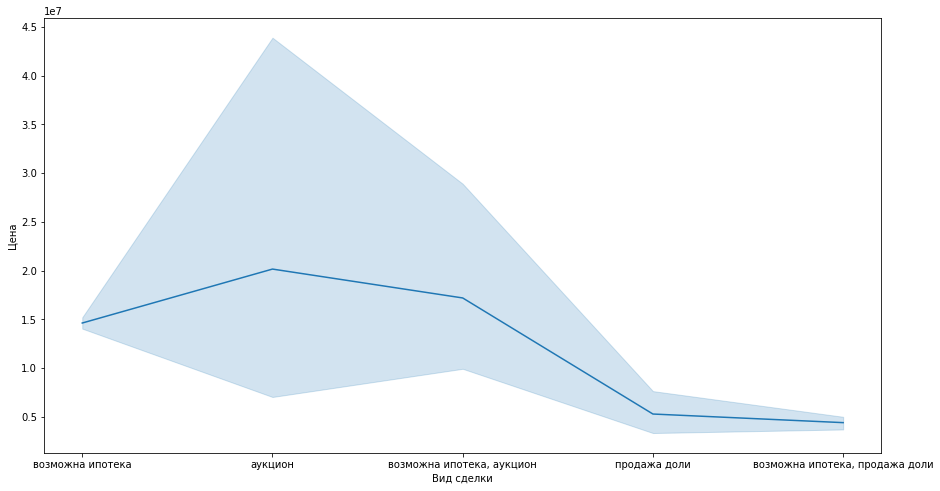

In [159]:
plt.figure(figsize=(15, 8))
sns.lineplot(data=df, x="Вид сделки", y="Цена")

На аукционе квартиры дороже, потому что их выкупают там в основном дилеры, поэтому там выставляют конечную цену сразу, а во всех остальных слкчаях можно поторговаться, поэтому они дороже

<AxesSubplot:xlabel='В доме', ylabel='Цена'>

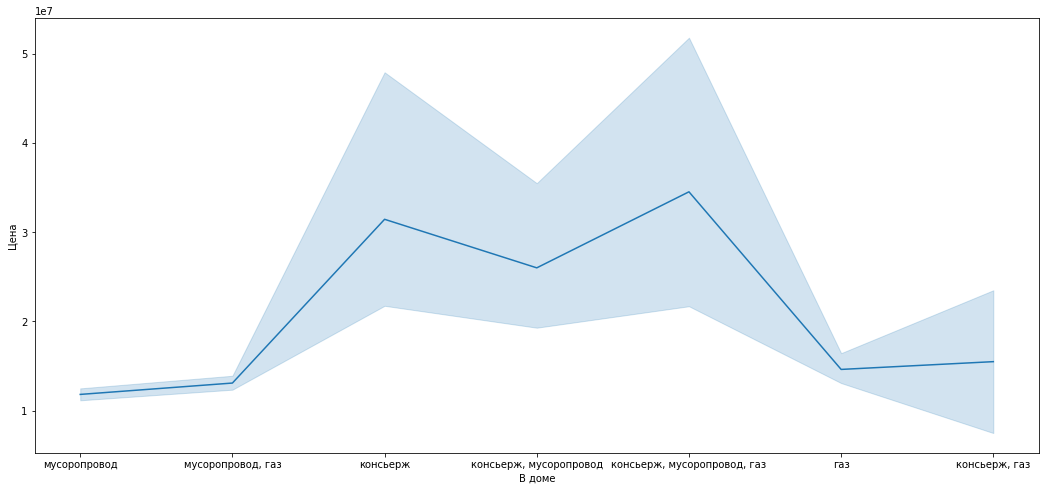

In [160]:
plt.figure(figsize=(18, 8))
sns.lineplot(data=df, x="В доме", y="Цена")

Когда все сразу опять же - дороже

<AxesSubplot:xlabel='Мебель', ylabel='Цена'>

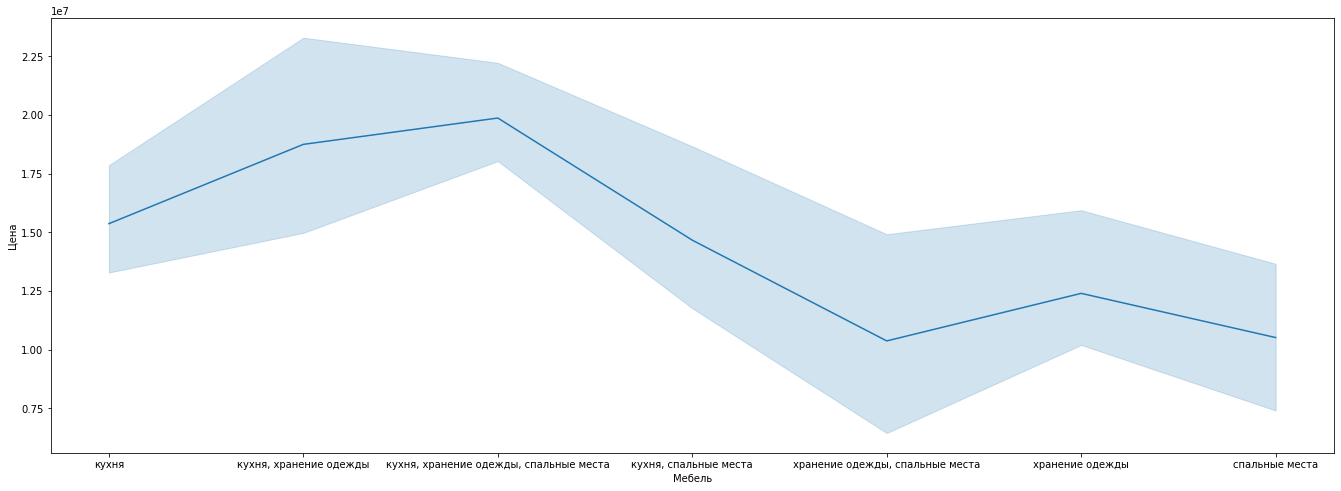

In [161]:
plt.figure(figsize=(23, 8))
sns.lineplot(data=df, x="Мебель", y="Цена")

Хранение одежды влияет сильнее на цену, чем наличие мебели, если брать вариант все сразу

<AxesSubplot:xlabel='Балкон или лоджия', ylabel='Цена'>

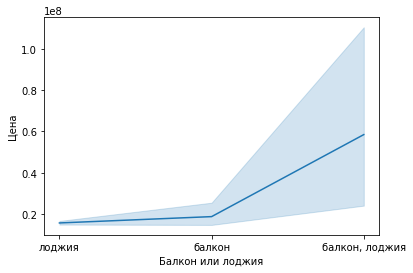

In [162]:
sns.lineplot(data=df, x="Балкон или лоджия", y="Цена")

Это вообще по царски, поэтому такая цена 

<AxesSubplot:xlabel='Тёплый пол', ylabel='Цена'>

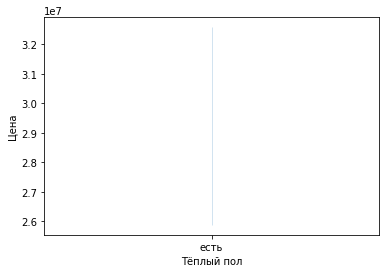

In [163]:
sns.lineplot(data=df, x="Тёплый пол", y="Цена")

Теплый пол = стоимость квартиры, потому что холодно в Москве

<AxesSubplot:xlabel='Отделка', ylabel='Цена'>

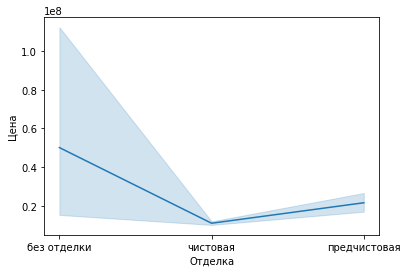

In [164]:
sns.lineplot(data=df, x="Отделка", y="Цена")

Без отделки дороже, потому что вам дают возможность самим поколхозить, а за это надо платить 

# Создание новых признаков

In [276]:
df['Инфраструктура'] = np.where(
    df[['Двор', 'Парковка']].isnull().any(axis=1),
    'Отсутствует',
    'Имеется'
)

In [277]:
df['Инфраструктура'].value_counts()

Имеется        1526
Отсутствует    1470
Name: Инфраструктура, dtype: int64

In [267]:
conditions = (
    (df['Ремонт'].isin(['дизайнерский', 'косметический', 'евро'])) &
    
    (~df[['Мебель','Техника']].isnull().any(axis=1))
)

df['Дополнительные траты'] = np.where(conditions, 'Не нужны', 'Нужны вложения')

In [268]:
df['Дополнительные траты'].value_counts()

Нужны вложения    2309
Не нужны           687
Name: Дополнительные траты, dtype: int64

In [270]:
conditions = (
    (~df[['Пассажирский лифт', 'Грузовой лифт']].isnull().any(axis=1)) &
    (~df[['Балкон или лоджия', 'В доме', 'Тёплый пол']].isnull().any(axis=1))
)
df['Удобства'] = np.where(conditions, 'Комфортно жить', 'Так себе')

In [272]:
df['Удобства'].value_counts()

Так себе          2923
Комфортно жить      73
Name: Удобства, dtype: int64